# Homework 6 - Exploring Dataframe (again?)
### Created by Bharindra Kamanditya

Pelajari dan gunakan dataset Credit Card Customers yang tersedia di: 
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers. 

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sakshigoyal7/credit-card-customers")

print("Path to dataset files:", path)

/Users/macbook/Documents/Digital Skola Bootcamp/git_repo/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/macbook/Documents/Digital Skola Bootcamp/git_repo/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/macbook/.cache/kagglehub/datasets/sakshigoyal7/credit-card-customers/versions/1


Buatlah visualisasi dengan menggunakan python (library matplotlib/seaborn) dari berbagai 
kolom/variable sesuai perintah berikut: 

1. [50  poin]  Buatlah  5  visualisasi  untuk  kolom  attrition_flag,  customer_age,  gender, 
education_level, dan income_category. Satu kolom satu visualisasi saja. Wajib ada pie 
chart, donut chart, vertical bar chart, dan horizontal bar chart (pilih salah satu untuk 
suatu kolom). 

2. [5 poin] Tuliskan informasi/insight dari setiap visualisasi yang dibuat untuk No. 1. 

3. [10 poin] Buatlah 1 visualisasi menggunakan countplot yang memadukan lebih dari satu kolom (bebas antar kolom yang mana saja) 

4. [10 poin] Buatlah 1 visualisasi menggunakan scatterplot yang memadukan lebih dari satu kolom (bebas antar kolom yang mana saja) 

5. [10 poin] Buatlah 1 visualisasi menggunakan heatmap yang memadukan lebih dari satu kolom (bebas antar kolom yang mana saja) 

6. [15 poin] Tuliskan insight dari setiap visualisasi yang dibuat untuk No. 3-5. 
 
Kumpulkan jawaban dalam bentuk link Google Colab, dan pastikan aksesnya dibuat public. 

## Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [ ]:
df_customer = pd.read_csv('BanbkChurners.csv')

In [4]:
df_customer

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## Tugas soal no. 1 
#### [50  poin]  Buatlah  5  visualisasi  untuk  kolom  attrition_flag,  customer_age,  gender, education_level, dan income_category. Satu kolom satu visualisasi saja. Wajib ada pie chart, donut chart, vertical bar chart, dan horizontal bar chart (pilih salah satu untuk suatu kolom). 

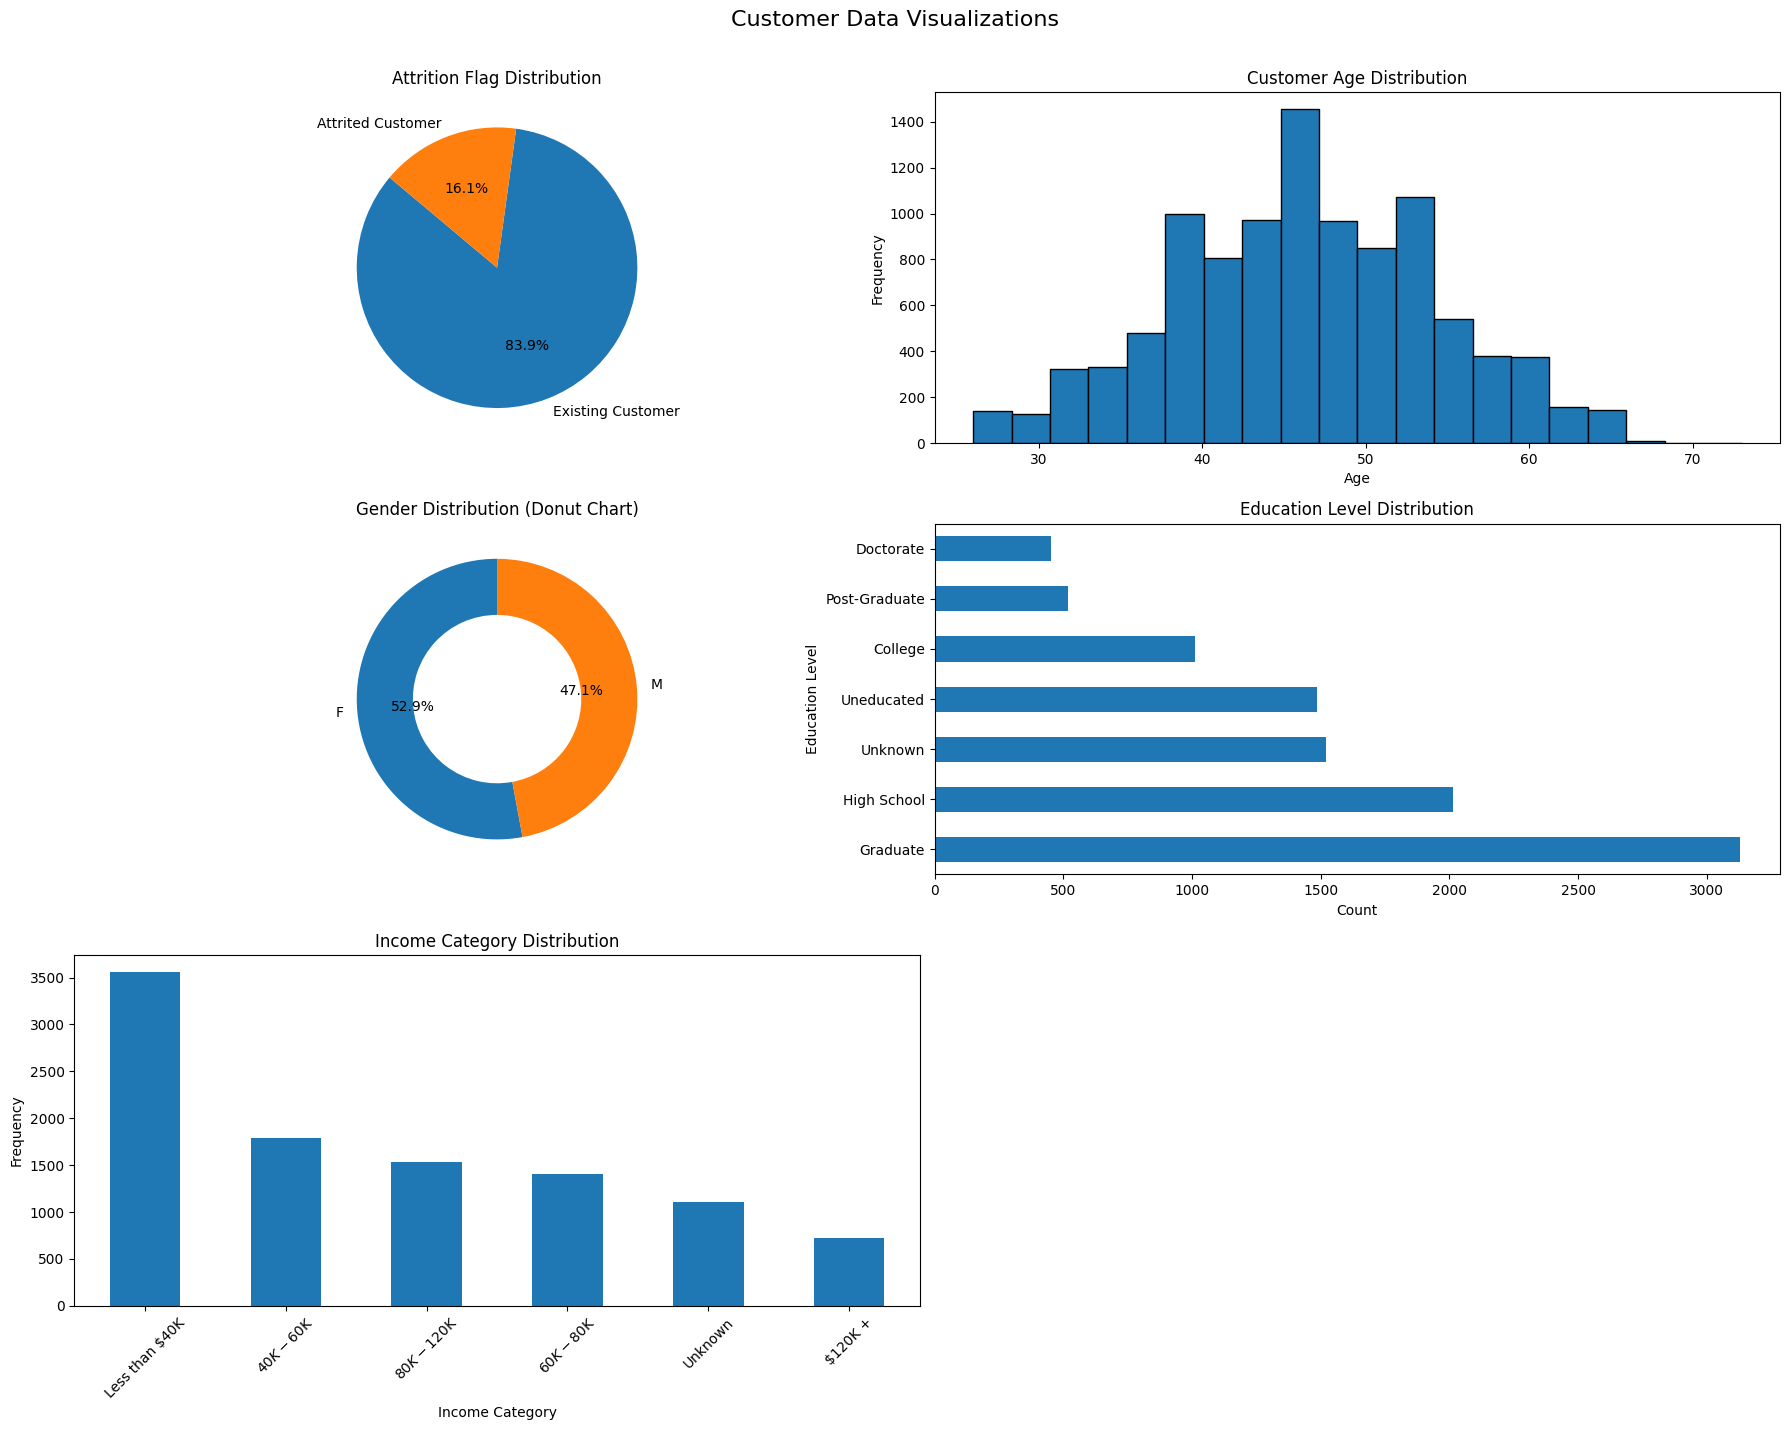

In [6]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))  # 3 rows, 2 columns

# Flatten the axes array for easier indexing
axes = axes.flatten()

# 1. Attrition Flag - Pie Chart
attrition_counts = df_customer['Attrition_Flag'].value_counts()
axes[0].pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Attrition Flag Distribution')
axes[0].set_ylabel('')

# 2. Customer Age - Histogram
axes[1].hist(df_customer['Customer_Age'], bins=20, edgecolor='black')
axes[1].set_title('Customer Age Distribution')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# 3. Gender - Donut Chart
gender_counts = df_customer['Gender'].value_counts()
axes[2].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
axes[2].set_title('Gender Distribution (Donut Chart)')
axes[2].set_ylabel('')

# 4. Education Level - Horizontal Bar Chart
education_counts = df_customer['Education_Level'].value_counts()
education_counts.plot(kind='barh', ax=axes[3])
axes[3].set_title('Education Level Distribution')
axes[3].set_xlabel('Count')
axes[3].set_ylabel('Education Level')

# 5. Income Category - Vertical Bar Chart
income_counts = df_customer['Income_Category'].value_counts()
income_counts.plot(kind='bar', ax=axes[4])
axes[4].set_title('Income Category Distribution')
axes[4].set_xlabel('Income Category')
axes[4].set_ylabel('Frequency')
axes[4].tick_params(axis='x', rotation=45)

# Remove the empty subplot
fig.delaxes(axes[5])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
plt.suptitle('Customer Data Visualizations', fontsize=16)  # Overall title for the figure
plt.show()

## Tugas soal no. 2 
#### [5 poin] Tuliskan informasi/insight dari setiap visualisasi yang dibuat untuk No. 1. 

> 1. Attrition Flag: Most customers stick around, which is great! But we should look into why some leave to see if we can improve.
>
> 2. Customer Age: Our typical customer is middle-aged. Maybe we can attract younger folks with different offers.
>
> 3. Gender: We have a pretty good balance of male and female customers.
>
> 4. Education Level: Lots of our customers have a college degree, so we can use more sophisticated language in our marketing.
>
> 5. Income Category: Many customers earn between $40K and $60K. We should offer services that fit their needs.

## Tugas soal no. 3
#### [10 poin] Buatlah 1 visualisasi menggunakan countplot yang memadukan lebih dari satu kolom (bebas antar kolom yang mana saja) 


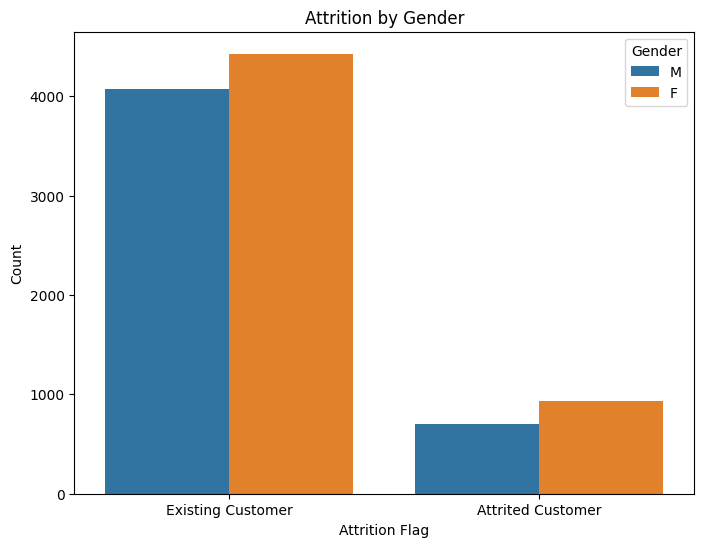

In [9]:
# Create a countplot of Attrition_Flag vs. Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition_Flag', hue='Gender', data=df_customer)
plt.title('Attrition by Gender')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

## Tugas soal no. 4
#### [10 poin] Buatlah 1 visualisasi menggunakan scatterplot yang memadukan lebih dari satu kolom (bebas antar kolom yang mana saja) 


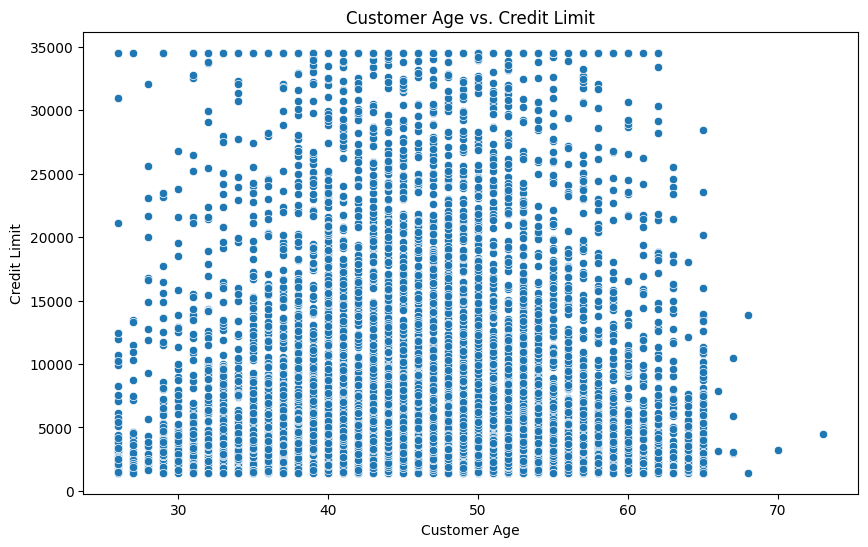

In [10]:
# Create a scatterplot of Customer_Age vs. Credit_Limit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer_Age', y='Credit_Limit', data=df_customer)
plt.title('Customer Age vs. Credit Limit')
plt.xlabel('Customer Age')
plt.ylabel('Credit Limit')
plt.show()

## Tugas soal no. 5
#### [10 poin] Buatlah 1 visualisasi menggunakan heatmap yang memadukan lebih dari satu kolom (bebas antar kolom yang mana saja) 


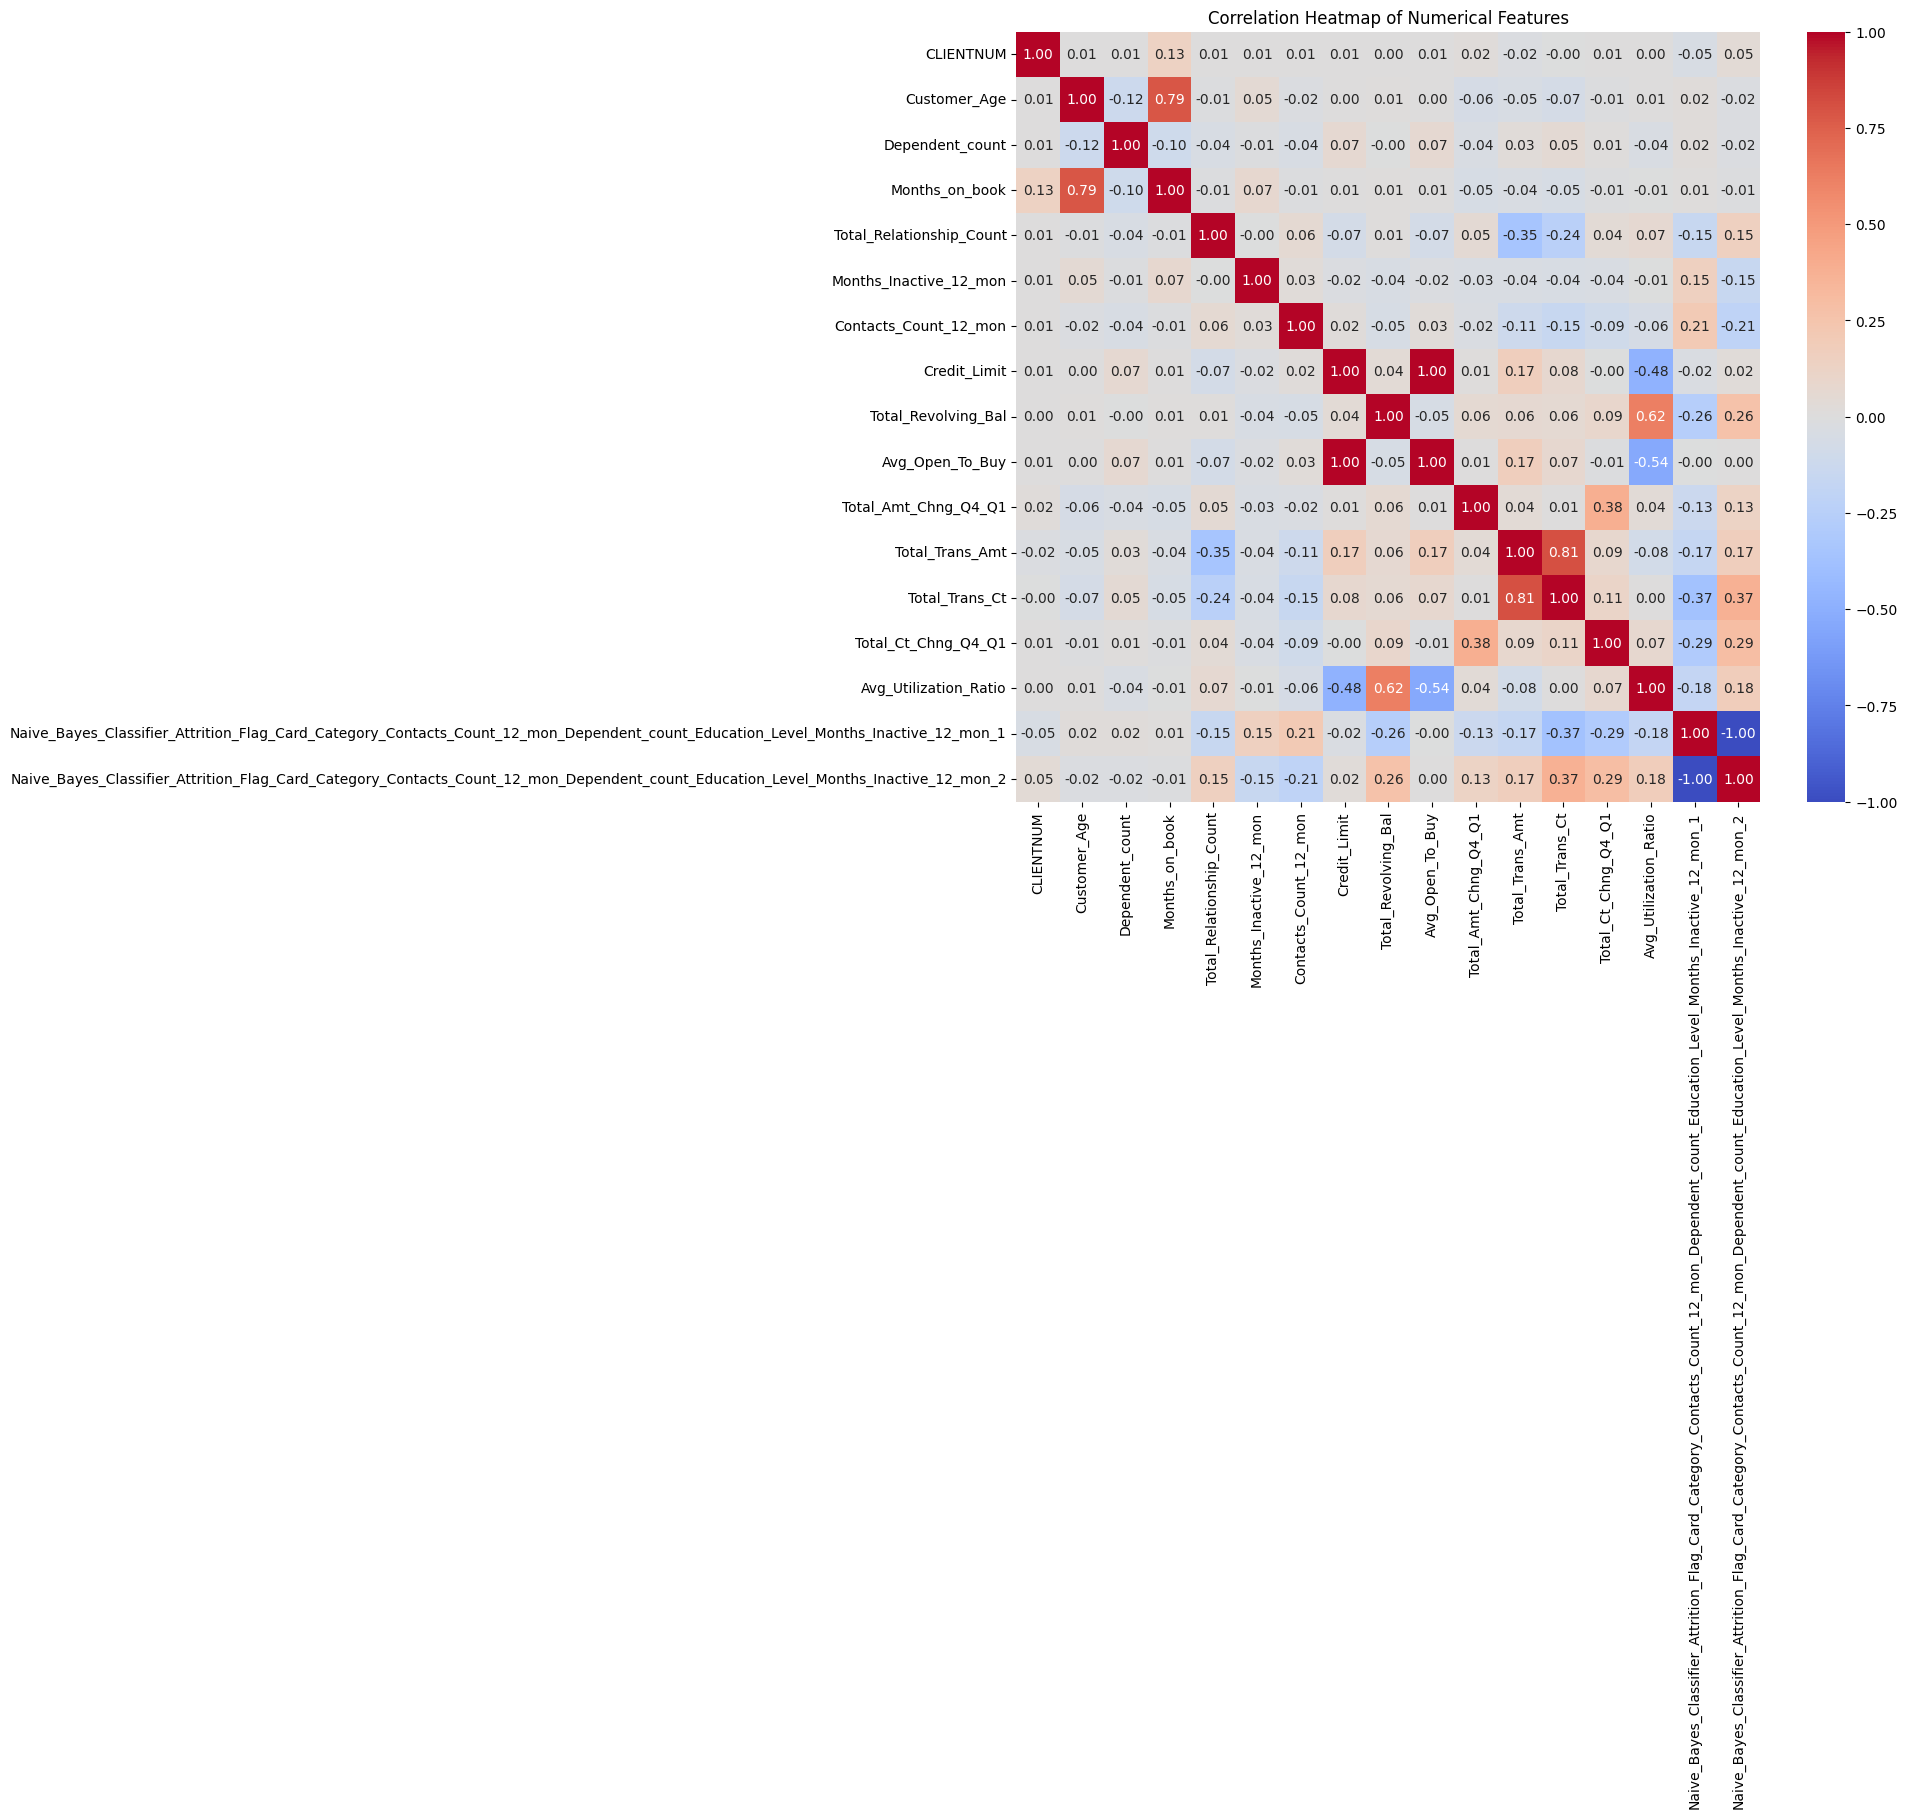

In [11]:
# Select numerical columns for the correlation matrix
numerical_cols = df_customer.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Tugas soal no. 6
#### [15 poin] Tuliskan insight dari setiap visualisasi yang dibuat untuk No. 3-5. 

> 1. Countplot (Attrition vs. Gender): "This chart shows if men or women are more likely to leave us. If we see a difference, we can try to figure out why and make sure everyone feels valued."
>
> 2. Scatterplot (Age vs. Credit Limit): "This plot helps us see if older customers tend to have higher credit limits. If so, we can check if we're being fair to younger customers just starting out."
>
> 3. Heatmap (Correlations): "This map shows how different things in our customer data relate. It helps us see what factors might influence each other, like income and credit score, so we can better understand our customers."
